<a href="https://colab.research.google.com/github/sanjaykumar545/RoadSafe-Analytics/blob/main/milestone1/week1/day5/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [4]:
ds=pd.read_csv('/content/drive/MyDrive/Infosys Internship/US_Accidents_March23.csv')

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [11]:
display(ds)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


UNIVARIATE ANALYSIS

/tmp/ipython-input-571127436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity',data=ds,palette='pastel')


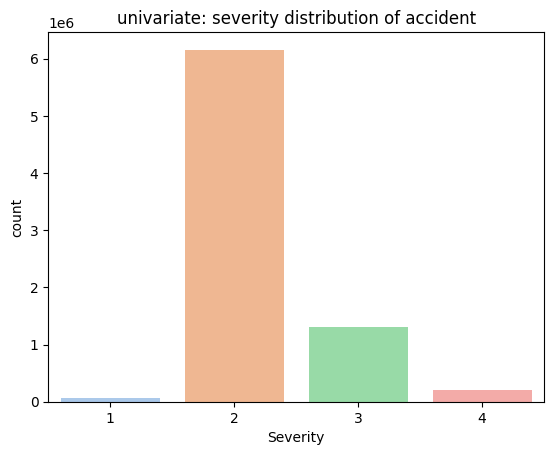

In [10]:
#DISTRIBUTION OF SEVERIT
sns.countplot(x='Severity',data=ds,palette='pastel')
plt.title("univariate: severity distribution of accident")
plt.show()

Bivariate Analysis

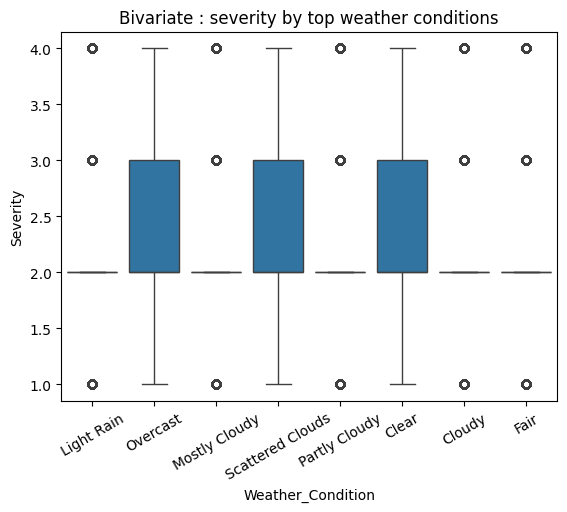

In [5]:
top_weather=ds['Weather_Condition'].value_counts().nlargest(8)
sns.boxplot(x='Weather_Condition',y='Severity',data=ds[ds['Weather_Condition'].isin(top_weather.index)])
plt.title('Bivariate : severity by top weather conditions')
plt.xticks(rotation=30)
plt.show()

Multivariate Analysis

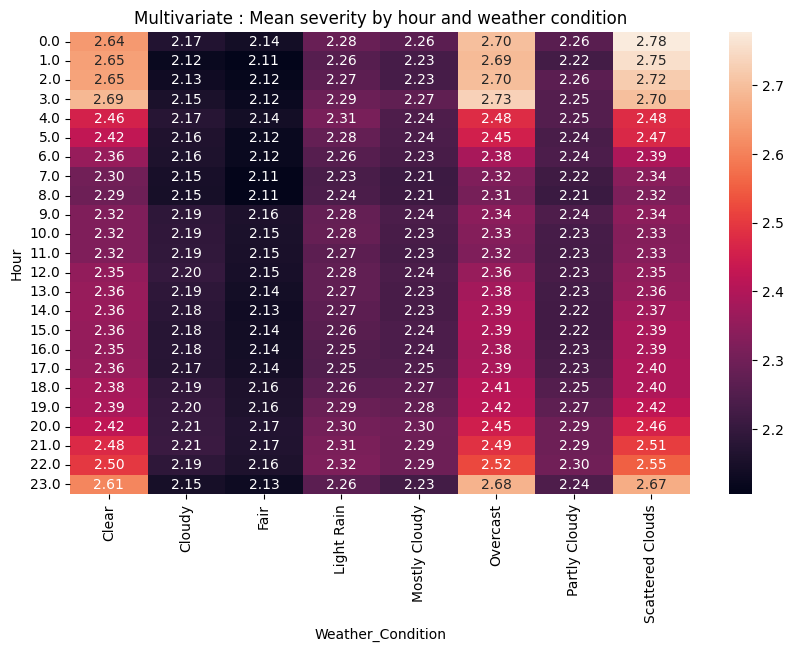

In [15]:
if 'Hour' not in ds:
  ds['Hour']=pd.to_datetime(ds['Start_Time'],errors='coerce').dt.hour
pivot=ds[ds['Weather_Condition'].isin(top_weather.index)].pivot_table(values='Severity',index='Hour',columns='Weather_Condition',aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot,annot=True,fmt=".2f")
plt.title("Multivariate : Mean severity by hour and weather condition")
plt.ylabel('Hour')
plt.xlabel('Weather_Condition')
plt.show()

Basic Statistics

In [18]:
#summary statics for all numerical columns
print("Summary statistics for numerical columns:")
print(ds.describe().T)

Summary statistics for numerical columns:
                       count       mean        std         min         25%  \
Severity           7728394.0   2.212384   0.487531    1.000000    2.000000   
Start_Lat          7728394.0  36.201195   5.076079   24.554800   33.399631   
Start_Lng          7728394.0 -94.702545  17.391756 -124.623833 -117.219396   
End_Lat            4325632.0  36.261829   5.272905   24.566013   33.462070   
End_Lng            4325632.0 -95.725570  18.107928 -124.545748 -117.754345   
Distance(mi)       7728394.0   0.561842   1.776811    0.000000    0.000000   
Temperature(F)     7564541.0  61.663286  19.013653  -89.000000   49.000000   
Wind_Chill(F)      5729375.0  58.251048  22.389832  -89.000000   43.000000   
Humidity(%)        7554250.0  64.831041  22.820968    1.000000   48.000000   
Pressure(in)       7587715.0  29.538986   1.006190    0.000000   29.370000   
Visibility(mi)     7551296.0   9.090376   2.688316    0.000000   10.000000   
Wind_Speed(mph)    715

In [20]:
print("Median values for numerical columns:")
display(ds.median(numeric_only=True))

Median values for numerical columns:


,0
Severity,2.000000
Start_Lat,35.823974
Start_Lng,-87.766616
End_Lat,36.183495
End_Lng,-88.027890
Distance(mi),0.030000
Temperature(F),64.000000
Wind_Chill(F),62.000000
Humidity(%),67.000000
Pressure(in),29.860000


severity value counts : 
Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64


/tmp/ipython-input-471969339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity',data=ds,palette='Blues')


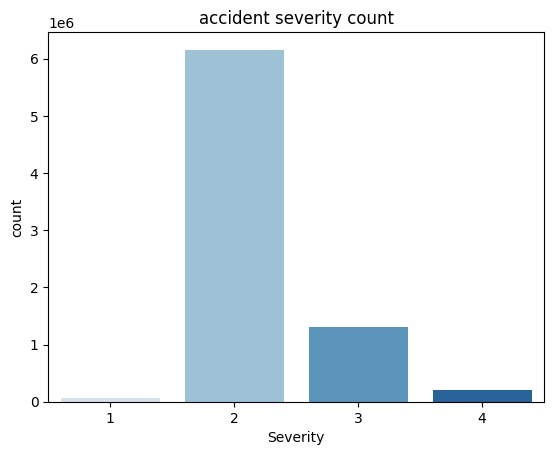

In [23]:
#distributions and ranges for key features
#1. severity
print("severity value counts : ")
print(ds['Severity'].value_counts().sort_index())

sns.countplot(x='Severity',data=ds,palette='Blues')
plt.title("accident severity count")
plt.show()

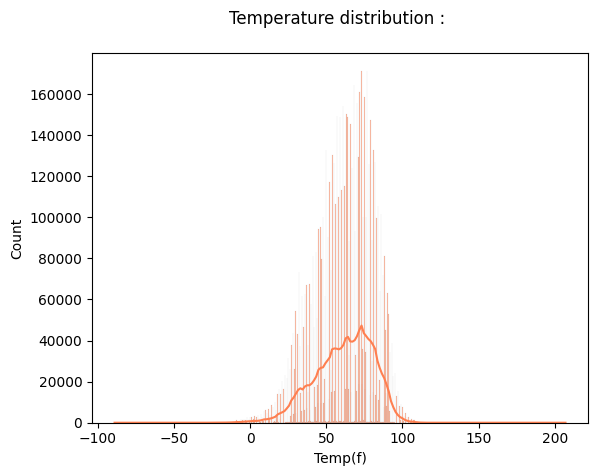

min temp :  -89.0


In [25]:
sns.histplot(ds['Temperature(F)'].dropna(),kde=True,color='coral')
plt.title("Temperature distribution : \n")
plt.xlabel("Temp(f)")
plt.show()
print("min temp : ",ds['Temperature(F)'].min())

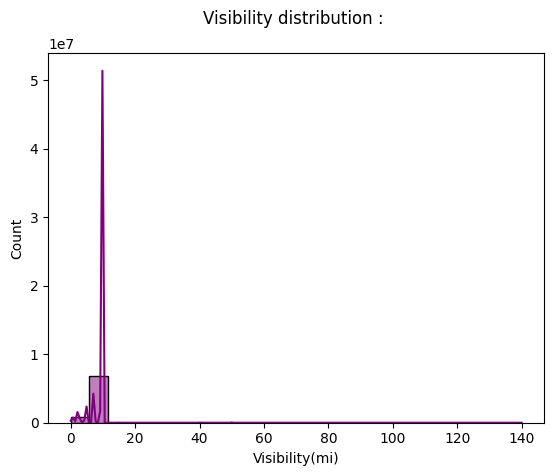

max visibility :  140.0


In [26]:
#3 visibility
sns.histplot(ds['Visibility(mi)'].dropna(),kde=True,color='purple')
plt.title("Visibility distribution : \n")
plt.xlabel("Visibility(mi)")
plt.show()
print("max visibility : ",ds['Visibility(mi)'].max())

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


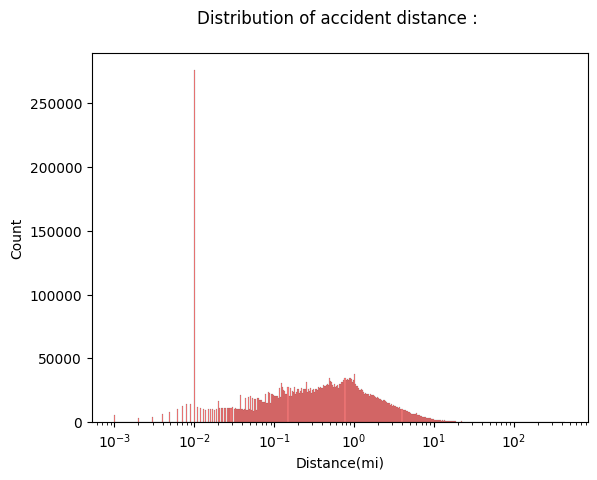

min distance :  0.0


In [27]:
#Distance
sns.histplot(ds['Distance(mi)'].dropna(),kde=True,color='red',log_scale=True)
plt.title("Distribution of accident distance : \n")
plt.xlabel("Distance(mi)")
plt.show()
print("min distance : ",ds['Distance(mi)'].min())


Most frequent weather conditions:
Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64


/tmp/ipython-input-2802863550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition',data=ds,order=ds['Weather_Condition'].value_counts().index[:10],palette='pastel')


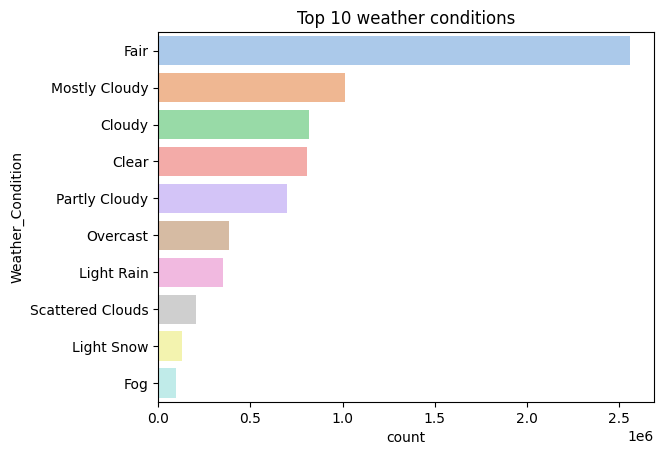

In [28]:
#5 Explore weather condition categories
print("\nMost frequent weather conditions:")
print(ds['Weather_Condition'].value_counts(dropna=True).head(10))
sns.countplot(y='Weather_Condition',data=ds,order=ds['Weather_Condition'].value_counts().index[:10],palette='pastel')
plt.title("Top 10 weather conditions")
plt.show()

In [29]:
#6 range
print("\n latitude  range :",ds['Start_Lat'].min(),"to",ds['Start_Lat'].max())
print("\n longitude  range :",ds['Start_Lng'].min(),"to",ds['Start_Lng'].max())


 latitude  range : 24.5548 to 49.002201

 longitude  range : -124.623833 to -67.113167
